In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
import matplotlib as plt
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from sklearn.metrics import *
import numpy as np
import pandas as pd
from sklearn.metrics import matthews_corrcoef

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_pickle("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/dataset.pkl")

In [ ]:
with open("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/testID.pkl", 'rb') as f:
    testID = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Multimodal Emotion Tracking/IEMOCAP ICON Features/trainID.pkl", 'rb') as f:
    trainID = pickle.load(f)

In [ ]:
X_train = []
y_train = []
for i in trainID:
  X_train.append(dataset[0][i])
  y_train.append(dataset[1][i])

print(len(X_train), len(y_train))

5810 5810


In [ ]:
X_test = []
y_test = []
for i in testID:
  X_test.append(dataset[0][i])
  y_test.append(dataset[1][i])

print(len(X_test), len(y_test))

1623 1623


In [ ]:
X = np.concatenate((X_train, X_test), axis=0)

In [ ]:
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Encoding target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Etiketlerin sayısal değerleri:")
print(label_mapping)

Etiketlerin sayısal değerleri:
{'ang': 0, 'exc': 1, 'fru': 2, 'hap': 3, 'neu': 4, 'sad': 5}


In [ ]:
print(np.where(y == 0)[0])

[  26   27   28   29   46   47   49   50   58   59   88   89   90   91
   92  107  108  130  159  163  185  186  187  188  189  194  195  196
  197  199  200  201  202  203  227  232  233  238  251  254  256  258
  259  260  261  262  263  269  292  306  416  417  418  419  420  422
  423  424  432  443  455  458  459  460  461  462  463  489  490  491
  492  515  516  517  526  527  528  529  530  531  535  539  571  572
  573  574  575  577  578  579  586  587  588  589  626  627  628  699
  705  706  711  730  731  732  734  736  740  748  749  753  754  759
  760  761  762  763  764  765  778  790  791  792  793  794  795  796
  797  798  805  832  834  839  840  856  857  858  859  860  861  862
  863  865  866  868  869  878  879  880  881  883  884  886  896  897
  899  961  962  963  964  965  970  971 1002 1003 1009 1010 1011 1012
 1013 1014 1080 1083 1087 1090 1091 1092 1099 1103 1104 1121 1122 1129
 1130 1161 1165 1167 1172 1188 1199 1201 1203 1205 1206 1207 1209 1211
 1222 

In [ ]:
X[7404]

"All right!  But don't think like that, because I mean, what the hell did we do all this for, Chris?  The whole business it's all for you!  The whole shooting match is for you!"

In [ ]:
print(np.where(y == 2)[0])

[  12   13   14   15   16   24   32   42   43   44   45   48   51   53
   57   61   74   75   79   80   84   85   93   94   95   96   98   99
  100  102  104  110  111  122  123  124  125  126  127  128  129  131
  132  133  137  138  139  141  144  145  146  147  149  151  153  154
  157  158  160  161  162  165  166  168  171  175  178  179  180  183
  190  191  192  193  213  228  231  234  235  236  237  248  249  250
  252  255  257  271  288  289  291  294  295  296  297  298  301  302
  303  304  305  308  309  310  319  320  321  322  331  332  339  340
  345  358  359  361  362  366  368  369  377  381  382  383  396  397
  399  401  402  408  409  433  434  456  457  464  465  466  467  468
  469  470  474  475  476  477  478  479  480  481  482  486  508  509
  514  521  522  523  524  525  534  536  537  538  540  541  542  543
  545  546  547  562  563  566  567  569  576  580  581  582  590  625
  629  630  631  632  633  634  635  636  637  649  650  658  659  660
  661 

In [ ]:
X[3340]

'What have I got to hide? What the hell is the matter with you, Kate?'

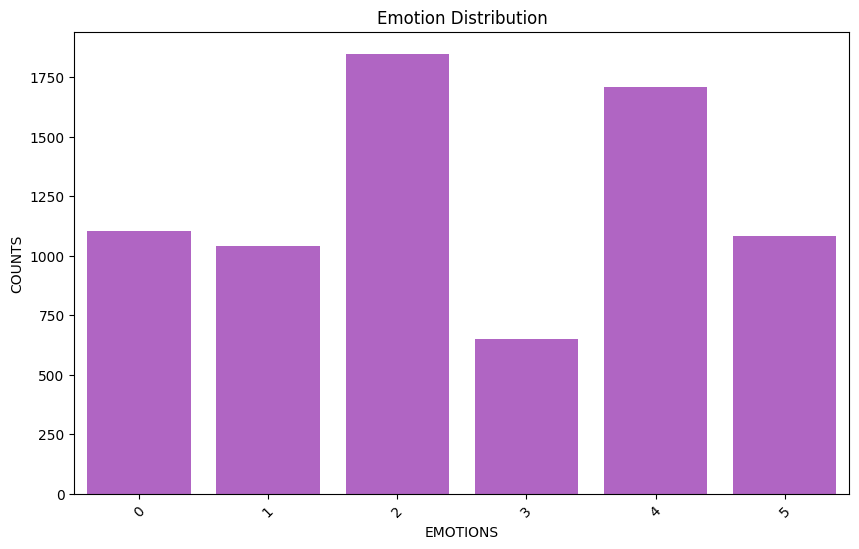

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim seti için sınıf dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x=y, color='#BA55D3')  # Çubuklar mor renkte olacak şekilde ayarlandı
plt.title('Emotion Distribution')
plt.xlabel('EMOTIONS')
plt.ylabel('COUNTS')
plt.xticks(rotation=45)  # X eksenindeki yazılar çapraz yazılacak şekilde ayarlandı
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim ve %20 doğrulama/test olarak ayır
x_train_full, x_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim setini %87.5 eğitim ve %12.5 doğrulama olarak ayır
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.125, random_state=42)

# Test setini ayır
x_test, y_test = x_temp, y_temp

# Veri setlerinin boyutlarını kontrol et
print(f'Train set size: {len(x_train)}')
print(f'Validation set size: {len(x_val)}')
print(f'Test set size: {len(x_test)}')

Train set size: 5202
Validation set size: 744
Test set size: 1487


In [ ]:
y_test

array([2, 2, 5, ..., 3, 0, 4])

In [ ]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)
x_val = x_val.astype(str)

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import pickle

# BERT tokenizer ve modeli yükle
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def prepare_data(data, max_len):
  inputs_ = []
  attention_mask = []
  for tweet in data:
    encoded_dict = tokenizer.encode_plus(
      tweet, #tweet to encode = (tokenize + add special character)
      add_special_tokens = True, # Add [CLS] for specify classification task and [SEP]
      max_length = max_len,
      pad_to_max_length  = True, #For pad & truncate all sentence
      return_attention_mask = True, # For return attention masks
      #return_tensors = 'pt' # Return pythorch tensors
    )
    # Select encoded sentence
    inputs_.append(encoded_dict['input_ids'])

    # Select attention masks
    attention_mask.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.tensor(inputs_)
  attention_masks = torch.tensor(attention_mask)

  return input_ids, attention_masks

In [ ]:
train_input_ids,train_mask  = prepare_data(x_train, 128)
test_input_ids,test_mask  = prepare_data(x_test, 128)
val_input_ids,val_mask  = prepare_data(x_val, 128)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
data = {
    'features': train_input_ids,
    'masks': train_mask,
    'labels':y_train
}


# Verileri pickle formatında kaydetme
with open("iemocap_bert_train.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
data = {
    'features': test_input_ids,
    'masks': test_mask,
    'labels': y_test

}
# Verileri pickle formatında kaydetme
with open("iemocap_bert_test.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
data = {
    'features': val_input_ids,
    'masks': val_mask,
    'labels': y_val

}

# Verileri pickle formatında kaydetme
with open("iemocap_bert_val.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
with open('iemocap_bert_train.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [ ]:
with open('iemocap_bert_test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
with open('iemocap_bert_val.pkl', 'rb') as f:
    val_data = pickle.load(f)

In [ ]:
train_emb = torch.tensor(train_data['features'])
train_mask = torch.tensor(train_data['masks'])
train_label = torch.tensor(train_data['labels'])

<ipython-input-26-141be46c9775>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_emb = torch.tensor(train_data['features'])
<ipython-input-26-141be46c9775>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_mask = torch.tensor(train_data['masks'])


In [ ]:
test_emb = torch.tensor(test_data['features'])
test_mask = torch.tensor(test_data['masks'])
test_label = torch.tensor(test_data['labels'])

<ipython-input-27-185402516e12>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_emb = torch.tensor(test_data['features'])
<ipython-input-27-185402516e12>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_mask = torch.tensor(test_data['masks'])


In [ ]:
val_emb = torch.tensor(val_data['features'])
val_mask = torch.tensor(val_data['masks'])
val_label = torch.tensor(val_data['labels'])

<ipython-input-28-84b047a61f12>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_emb = torch.tensor(val_data['features'])
<ipython-input-28-84b047a61f12>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_mask = torch.tensor(val_data['masks'])


In [ ]:
train_dataset = TensorDataset(train_emb,train_mask, train_label)
test_dataset = TensorDataset(test_emb, test_mask, test_label)
val_dataset = TensorDataset(val_emb,val_mask, val_label)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model ve tokenizer yükleyin
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 6,
    output_attentions = False,
    output_hidden_states = False
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 20
# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import numpy as np

# Number of successive epochs to observe for early stopping
patience = 3

# Initialize the early stopping counter
early_stopping_counter = 0

# Initial best validation loss; set it to positive infinity so that
# the first validation loss will be lower and will update this value
best_val_loss = np.Inf

# List to store training statistics
training_stats = []

# Start training loop
for epoch_i in range(epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data
    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Clear any previously calculated gradients
        model.zero_grad()

        # Forward pass
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs.loss

        # Accumulate the training loss
        total_train_loss += loss.item()

        # Backward pass
        loss.backward()

        # Clip gradients to prevent explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters
        optimizer.step()

        # Update the learning rate
        scheduler.step()

    # Calculate the average training loss
    avg_train_loss = total_train_loss / len(train_dataloader)
    print("\n \t Average training loss: {0:.2f}".format(avg_train_loss))


    # ========================================
    #            Validation Phase
    # ========================================
    print("\nValidation...")

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

            loss = outputs.loss
            logits = outputs.logits

        # Accumulate the validation loss
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate accuracy for this batch
        total_eval_accuracy += accuracy(logits, label_ids)

    # Calculate the average validation loss and accuracy
    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(val_dataloader)
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))

    # Record statistics for this epoch
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy
        }
    )

    # Check if the validation loss is decreasing
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0  # Reset early stopping counter
    else:
        early_stopping_counter += 1  # Increment early stopping counter

    # If validation loss hasn't improved for 'patience' epochs, stop training
    if early_stopping_counter >= patience:
        print("Early stopping triggered. No improvement in validation loss.")
        break



======== Epoch 1 / 20 ========
Training...

 	 Average training loss: 1.58

Validation...
  Accuracy: 0.45
  Validation Loss: 1.38

======== Epoch 2 / 20 ========
Training...

 	 Average training loss: 1.20

Validation...
  Accuracy: 0.54
  Validation Loss: 1.20

======== Epoch 3 / 20 ========
Training...

 	 Average training loss: 0.93

Validation...
  Accuracy: 0.54
  Validation Loss: 1.19

======== Epoch 4 / 20 ========
Training...

 	 Average training loss: 0.73

Validation...
  Accuracy: 0.54
  Validation Loss: 1.26

======== Epoch 5 / 20 ========
Training...

 	 Average training loss: 0.59

Validation...
  Accuracy: 0.54
  Validation Loss: 1.31

======== Epoch 6 / 20 ========
Training...

 	 Average training loss: 0.48

Validation...
  Accuracy: 0.55
  Validation Loss: 1.42
Early stopping triggered. No improvement in validation loss.


In [ ]:
# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  prediction = np.argmax(logits, axis=1)

  # Store predictions and true labels
  for i in prediction:
    predictions.append(i)
  for i in label_ids:
    true_labels.append(i)

In [ ]:
def model_evaluation(real_v, pred_v):
    print(f"Accuracy sore: {accuracy_score(real_v, pred_v)}")
    print("Classification report:")
    print(classification_report(real_v, pred_v))
    cm = confusion_matrix(real_v, pred_v)
    print (f"Confusion matrix \n {cm}")
    return cm

In [ ]:
cm = model_evaluation(true_labels, predictions)

Accuracy sore: 0.5870880968392737
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       221
           1       0.66      0.53      0.59       217
           2       0.57      0.60      0.58       386
           3       0.49      0.43      0.46       109
           4       0.56      0.62      0.59       355
           5       0.63      0.65      0.64       199

    accuracy                           0.59      1487
   macro avg       0.59      0.57      0.58      1487
weighted avg       0.59      0.59      0.59      1487

Confusion matrix 
 [[130   5  66   0  14   6]
 [  7 116  13  31  42   8]
 [ 56   8 231   2  64  25]
 [  5  21   7  47  23   6]
 [ 12  22  61   9 220  31]
 [  1   4  27   7  31 129]]


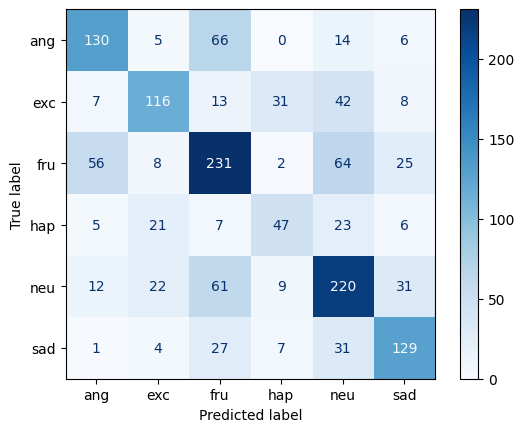

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predictions)

labels = encoder.inverse_transform(np.arange(6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
encoder

LabelEncoder()

In [ ]:
labels

array(['ang', 'exc', 'fru', 'hap', 'neu', 'sad'], dtype='<U3')

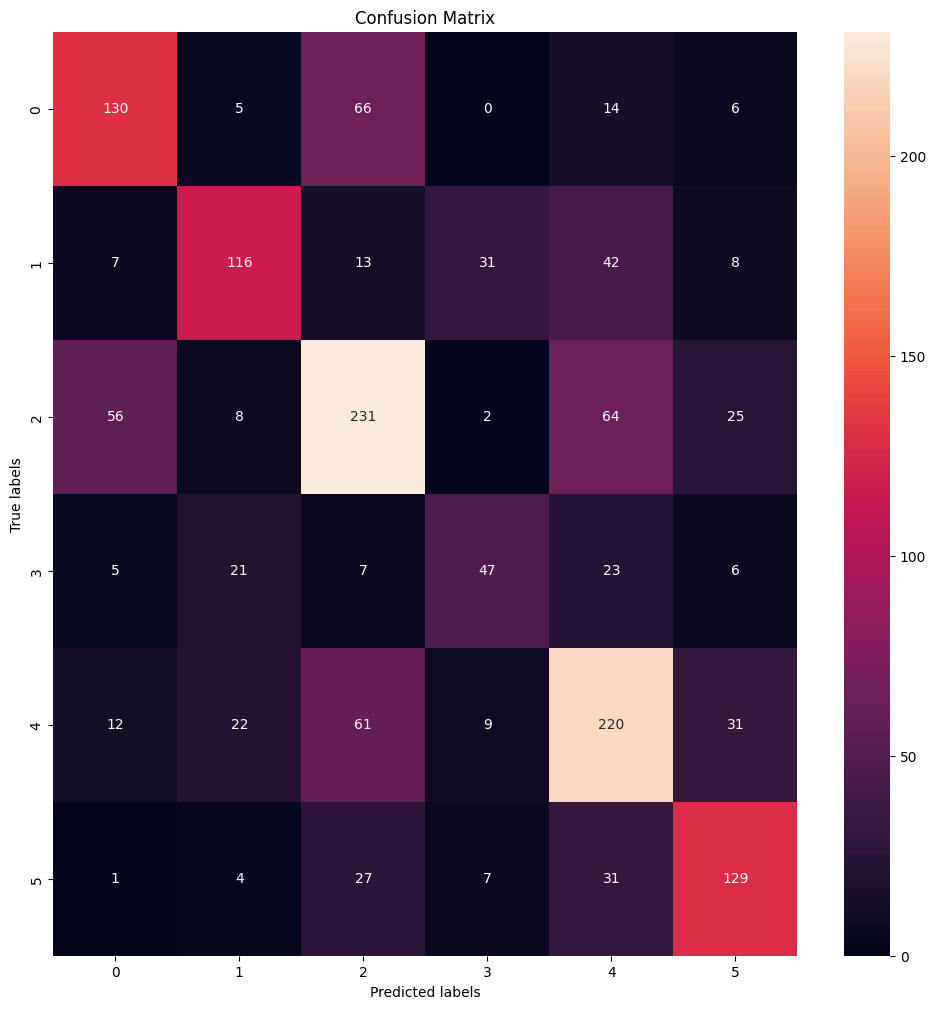

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Büyük boyutlu bir figür oluşturun
plt.figure(figsize=(12, 12))

# Isı haritasını çizin
ax = plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');